**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose


**Load and Prepare Data, Selecting Target Variable and Check for Missing Values**

In [25]:
# Load the data (replace with your data path)
df = pd.read_excel("Sample_datasets.xlsx")

# Convert 'obstime' to datetime and set it as the index
df['obstime'] = pd.to_datetime(df['obstime'])
df.set_index('obstime', inplace=True)

# Set the frequency of the index (Daily frequency)
df = df.asfreq('D')

# Select the target variable for analysis (e.g., temperature)
target_variable = 'tempr'

# Check for missing values
print(f"Missing values in {target_variable}:")
print(df[target_variable].isnull().sum())

# Handle missing values
# Drop rows with missing values
df = df.dropna(subset=[target_variable])

# Option 2: Fill missing values (if you prefer interpolation)
# df[target_variable] = df[target_variable].interpolate(method='linear')

Missing values in tempr:
7


**Selecting Target Variable and Check for Missing Values**

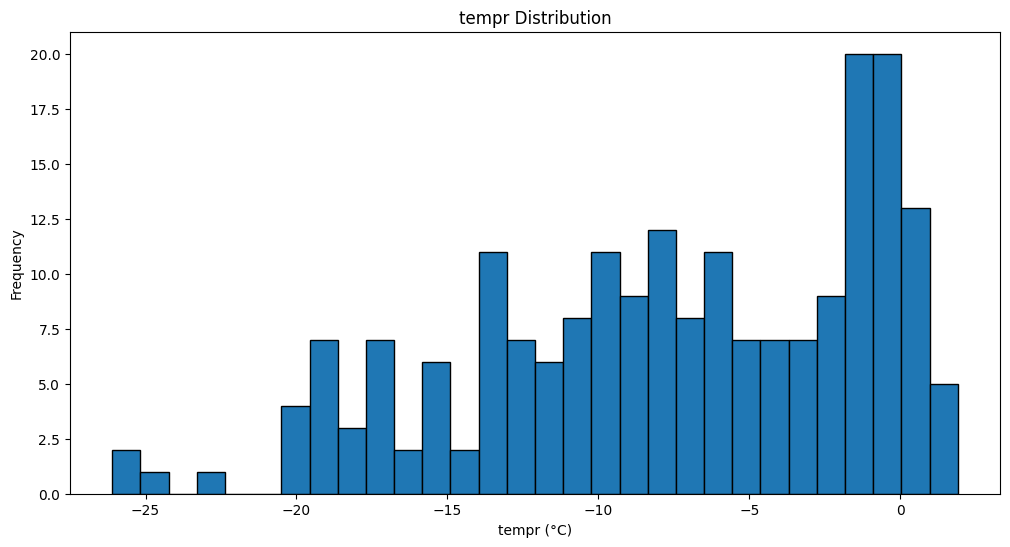

In [17]:
# Data Exploration
plt.figure(figsize=(12, 6))
plt.hist(df[target_variable], bins=30, edgecolor='black')
plt.title(f"{target_variable} Distribution")
plt.xlabel(f'{target_variable} (°C)')
plt.ylabel('Frequency')
plt.show()



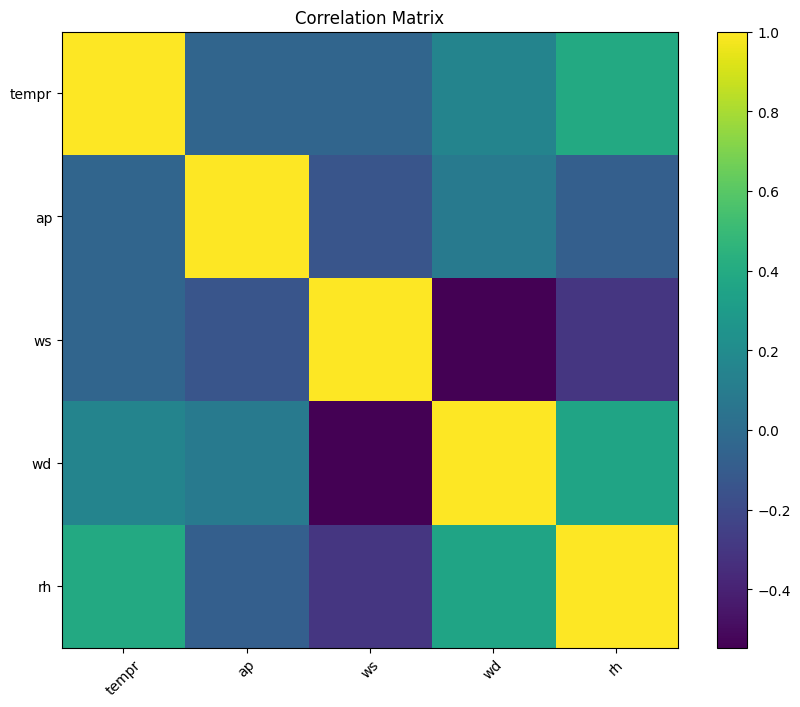

In [16]:
# Correlation analysis (if applicable)
if df.shape[1] > 1:
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Correlation Matrix')
    plt.show()

**ADF test for stationarity**

ADF Test: tempr
ADF Test Statistic: -1.3176981798163405
p-value: 0.6210369831110392
#Lags Used: 5
Number of Observations Used: 200
Weak evidence against the null hypothesis, indicating the data is non-stationary.


ADF Test: tempr (Differenced)
ADF Test Statistic: -9.957590402029403
p-value: 2.4210141593536918e-17
#Lags Used: 4
Number of Observations Used: 200
Strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary.




<Figure size 1200x800 with 0 Axes>

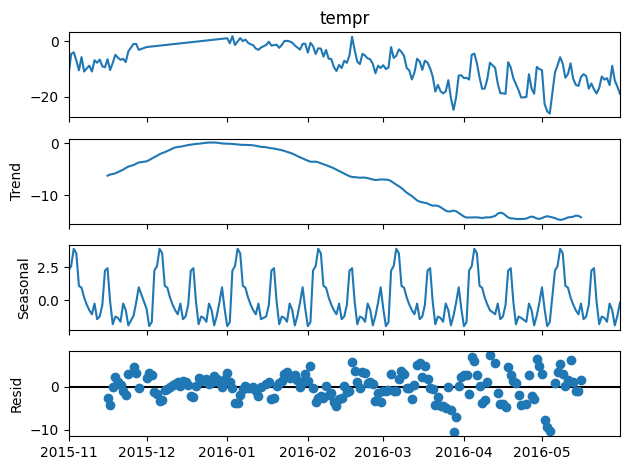

In [14]:
# ADF test for stationarity
def adf_test(series, title=''):
    print(f'ADF Test: {title}')
    result = adfuller(series.dropna())
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary.")
    else:
        print("Weak evidence against the null hypothesis, indicating the data is non-stationary.")
    print('\n')

adf_test(df[target_variable], target_variable)

# Differencing to make the data stationary (if needed)
df_diff = df[target_variable].diff().dropna()

# Recheck stationarity after differencing
adf_test(df_diff, title=f'{target_variable} (Differenced)')

# Decompose time series for trend, seasonal, and residual components
# Choose a smaller period due to limited data length
period = 30  # Assuming monthly seasonality for daily data

if len(df) >= 2 * period:
    decomposition = seasonal_decompose(df[target_variable], model='additive', period=period)
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.show()
else:
    print(f"Insufficient data for seasonal decomposition with period {period}. Skipping decomposition.")

**ACF PACF and Final Predictions **

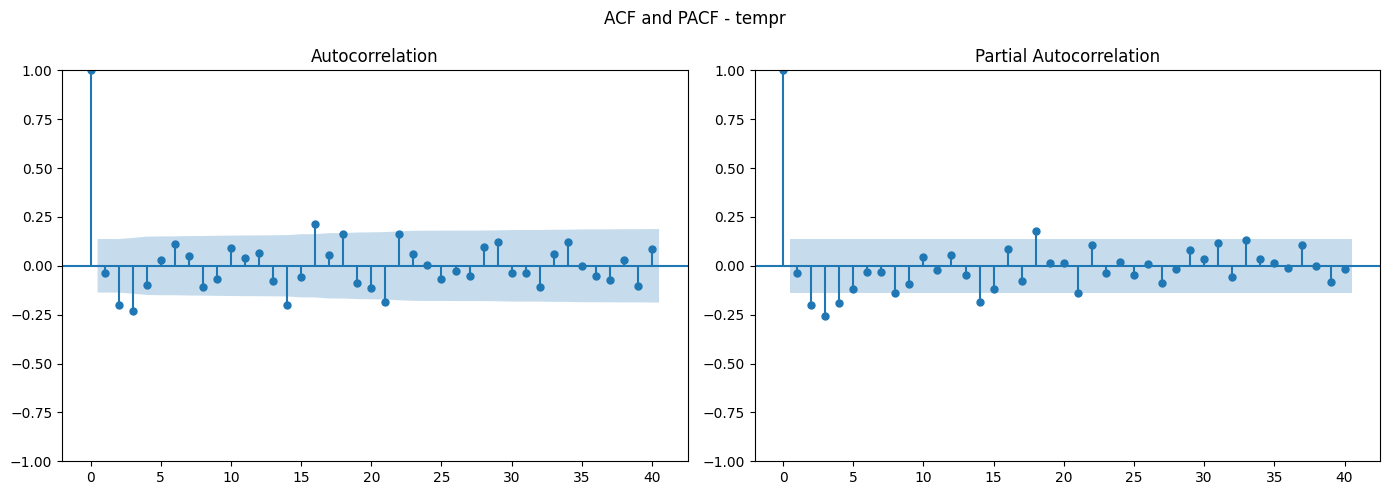

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  tempr   No. Observations:                  206
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -506.867
Date:                Sun, 25 Aug 2024   AIC                           1031.734
Time:                        08:24:36   BIC                           1061.642
Sample:                             0   HQIC                          1043.831
                                - 206                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5255      0.479      3.182      0.001       0.586       2.465
ar.L2         -1.8021      0.649     -2.778      0.005      -3.074      -0.531
ar.L3          0.8932      0.67

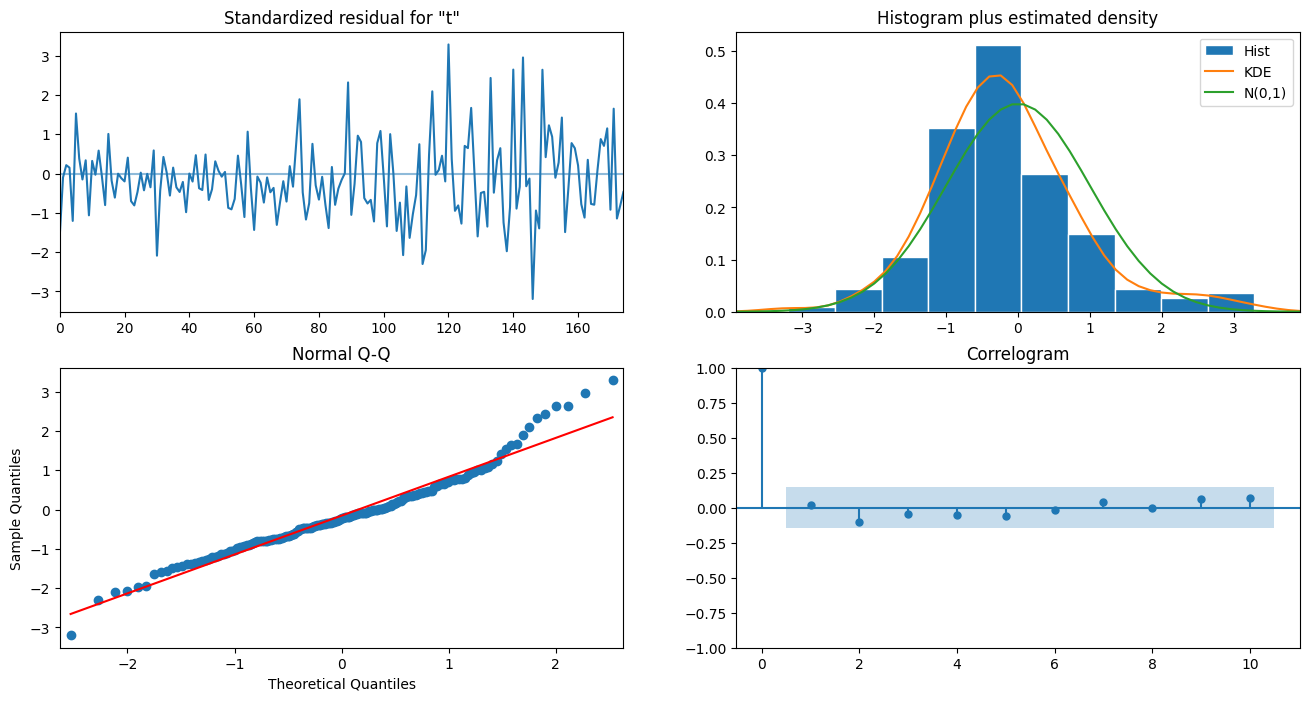

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


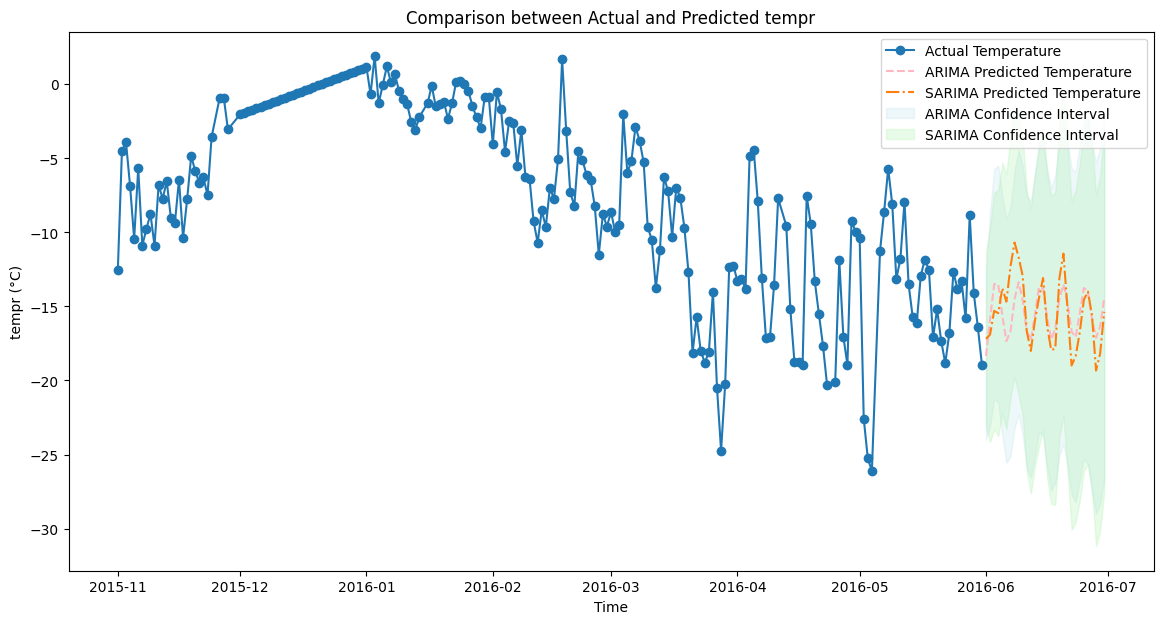

          Date  ARIMA_Predicted  ARIMA_Lower_CI  ARIMA_Upper_CI  \
206 2016-06-01       -18.344818      -23.969411      -12.720225   
207 2016-06-02       -15.836169      -23.036255       -8.636083   
208 2016-06-03       -13.493647      -21.275510       -5.711785   
209 2016-06-04       -13.492317      -21.488920       -5.495714   
210 2016-06-05       -15.609837      -23.712659       -7.507015   
211 2016-06-06       -17.335651      -25.555705       -9.115598   
212 2016-06-07       -16.698048      -25.118622       -8.277474   
213 2016-06-08       -14.507101      -23.197805       -5.816397   
214 2016-06-09       -13.361130      -22.287167       -4.435093   
215 2016-06-10       -14.588836      -23.667627       -5.510044   

     SARIMA_Predicted  SARIMA_Lower_CI  SARIMA_Upper_CI  
206        -17.191765       -23.099585       -11.283945  
207        -16.895667       -24.150913        -9.640421  
208        -15.296966       -23.273680        -7.320253  
209        -15.453715       -2

In [24]:
# Plot ACF and PACF to determine model parameters (p, q)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df_diff, lags=40, ax=ax1)
plot_pacf(df_diff, lags=40, ax=ax2)
plt.suptitle(f"ACF and PACF - {target_variable}")
plt.tight_layout()
plt.show()


# Build ARIMA and SARIMA models (adjust parameters based on ACF/PACF)
p, d, q = 4, 1, 4   # Adjust these parameters
P, D, Q, s = 1, 1, 1, period  # Seasonal component based on shorter period

try:
    # Build ARIMA model
    model_arima = ARIMA(df[target_variable], order=(p, d, q))
    model_arima_fit = model_arima.fit()

    # Build SARIMA model
    model_sarima = SARIMAX(df[target_variable], order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_sarima_fit = model_sarima.fit()

    # Evaluate models
    print("ARIMA Model Summary:")
    print(model_arima_fit.summary())

    print("SARIMA Model Summary:")
    print(model_sarima_fit.summary())

    # Plot diagnostics for the chosen model
    model_sarima_fit.plot_diagnostics(figsize=(16, 8))
    plt.show()

    # Make predictions
    forecast_horizon = 30  # Adjust prediction length
    arima_pred = model_arima_fit.get_forecast(steps=forecast_horizon)
    sarima_pred = model_sarima_fit.get_forecast(steps=forecast_horizon)

    # Generate predicted values and confidence intervals
    arima_pred_mean = arima_pred.predicted_mean
    arima_pred_ci = arima_pred.conf_int()
    sarima_pred_mean = sarima_pred.predicted_mean
    sarima_pred_ci = sarima_pred.conf_int()

    # Create a new index for the predicted values
    future_dates = pd.date_range(df.index[-1], periods=forecast_horizon+1, freq='D')[1:]

   # Plot actual vs. predicted values
    plt.figure(figsize=(14, 7))
    plt.plot(df[target_variable], label='Actual Temperature', marker='o')
    plt.plot(future_dates, arima_pred_mean, label='ARIMA Predicted Temperature', linestyle='--', color='lightpink')
    plt.plot(future_dates, sarima_pred_mean, label='SARIMA Predicted Temperature', linestyle='-.')
    plt.fill_between(future_dates, arima_pred_ci.iloc[:, 0], arima_pred_ci.iloc[:, 1], color='lightblue', alpha=0.2, label='ARIMA Confidence Interval')
    plt.fill_between(future_dates, sarima_pred_ci.iloc[:, 0], sarima_pred_ci.iloc[:, 1], color='lightgreen', alpha=0.2, label='SARIMA Confidence Interval')
    plt.title(f"Comparison between Actual and Predicted {target_variable}")
    plt.xlabel('Time')
    plt.ylabel(f"{target_variable} (°C)")
    plt.legend()
    plt.show()


    # Tabularize the forecasted ARIMA and SARIMA model values
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'ARIMA_Predicted': arima_pred_mean,
        'ARIMA_Lower_CI': arima_pred_ci.iloc[:, 0],
        'ARIMA_Upper_CI': arima_pred_ci.iloc[:, 1],
        'SARIMA_Predicted': sarima_pred_mean,
        'SARIMA_Lower_CI': sarima_pred_ci.iloc[:, 0],
        'SARIMA_Upper_CI': sarima_pred_ci.iloc[:, 1]
    })

    print(forecast_df.head(10))  # Display the first 10 rows of the forecast

    # Calculate Mean Squared Error (MSE)
    y_truth = df[target_variable].iloc[-forecast_horizon:]
    arima_mse = mean_squared_error(y_truth, arima_pred_mean[:len(y_truth)])
    sarima_mse = mean_squared_error(y_truth, sarima_pred_mean[:len(y_truth)])
    print(f"ARIMA MSE: {arima_mse:.2f}")
    print(f"SARIMA MSE: {sarima_mse:.2f}")

except Exception as e:
    print(f"Failed to build ARIMA or SARIMA model. Error: {e}")